In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')
import seaborn as sns
import re
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

/Users/sandeephulsur/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('covid19_tweets.csv', sep=',',engine='python')

In [3]:
df.shape

(125101, 13)

In [4]:
df.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description   user_created  \
0  wednesday addams as a disney princess keepin i...   5/26/17 5:46   
1  Husband, Father, Columnist & Commentator. Auth...  4/16/09 20:06   
2  #Christian #Catholic #Conservative #Reagan #Re...  2/28/09 18:57   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...    3/7/19 1:45   
4  🖊️Official Twitter handle of Department of Inf...   2/12/17 6:45   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

            date                                               text  \
0  7/25/20 12:27  If I smelled the scent of hand sanitizers toda...   
1  7/25/20 12:27  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  7/25/20 12:27  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  7/25/20 12:27  @brookbanktv The one gift #COVID19 has give me...   
4  7/25/20 12:27  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

In [5]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [6]:
df.describe()

user_followers   user_friends  user_favourites
count    1.251010e+05  125101.000000     1.251010e+05
mean     1.059816e+05    2095.822879     1.420585e+04
std      8.262373e+05    9019.291809     4.408512e+04
min      0.000000e+00       0.000000     0.000000e+00
25%      1.750000e+02     153.000000     2.100000e+02
50%      1.004000e+03     551.000000     1.769000e+03
75%      5.289000e+03    1723.000000     9.159000e+03
max      4.944256e+07  497363.000000     2.047197e+06

In [7]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

user_location       25192
user_description     6957
hashtags            35971
source                 36
dtype: int64

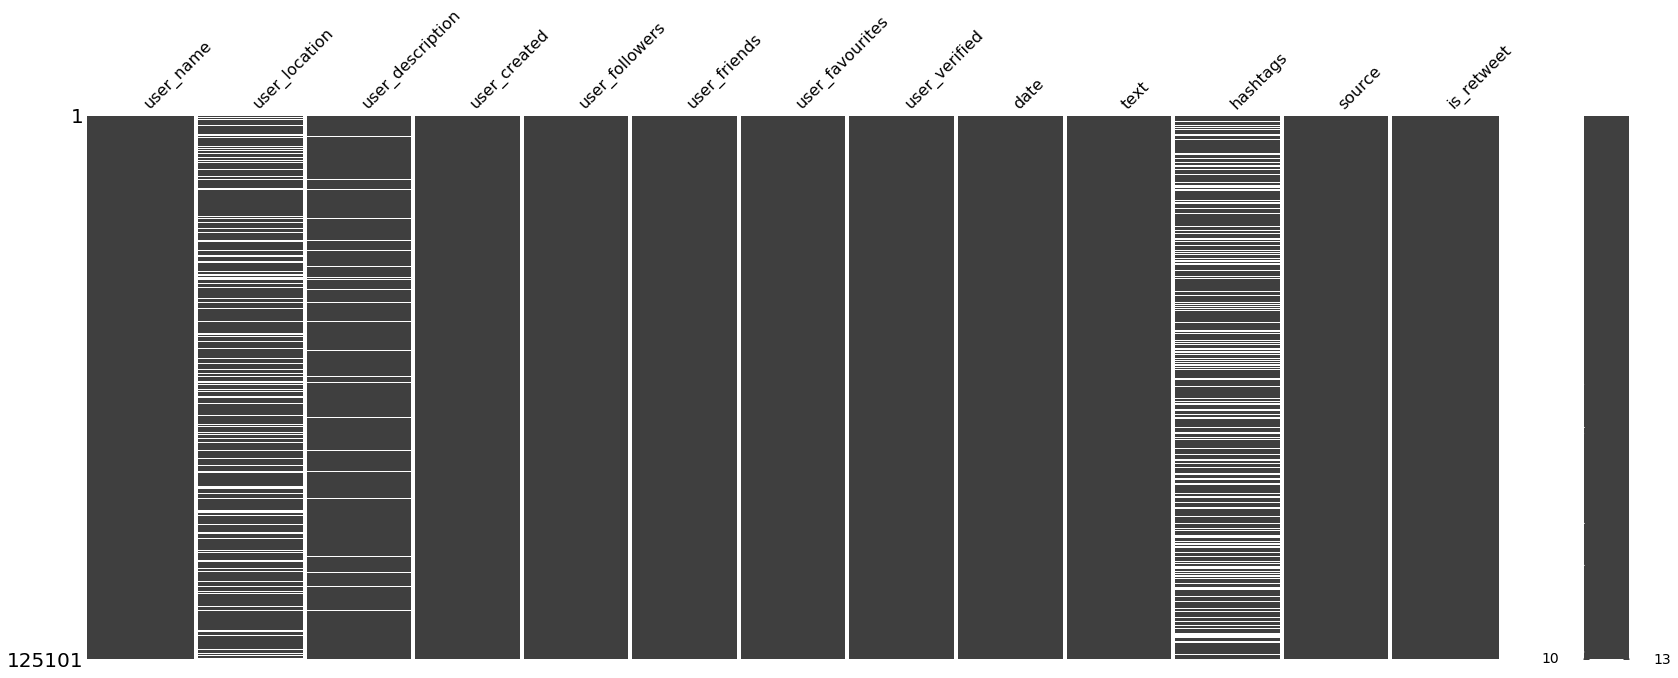

In [8]:
msno.matrix(df) 

In [9]:
df.nunique()

user_name            70423
user_location        21397
user_description     67474
user_created         70979
user_followers       22425
user_friends          9404
user_favourites      28321
user_verified            2
date                  4385
text                124842
hashtags             38132
source                 544
is_retweet               1
dtype: int64

Text(0.5, 1.0, 'Users with most number of tweets')

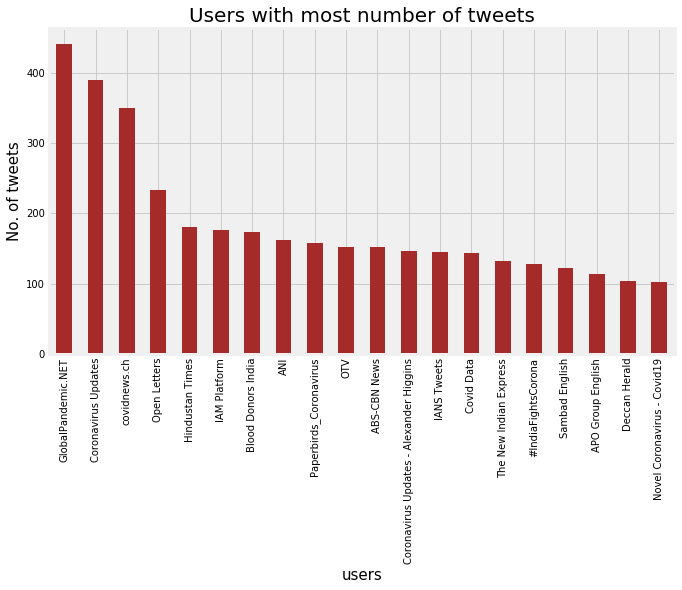

In [10]:
ax = df['user_name'].value_counts().nlargest(20).plot(kind = 'bar', figsize=(10, 6), color= 'brown')
ax.set_xlabel('users', fontsize = '15')           # To set x axis label
ax.set_ylabel('No. of tweets', fontsize = '15')  # To set y axis label
ax.set_title('Users with most number of tweets', fontsize = '20') 

Text(0.5, 1.0, 'Countries with most number of tweets ')

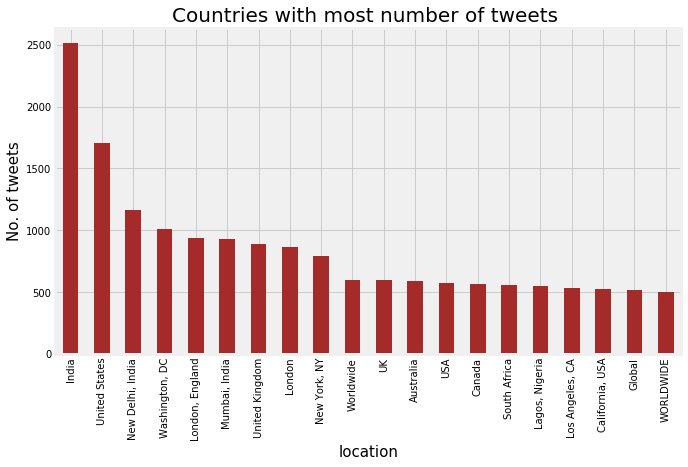

In [11]:
ax = df['user_location'].value_counts().nlargest(20).plot(kind = 'bar', figsize=(10, 6), color= 'brown')
ax.set_xlabel('location', fontsize = '15')           # To set x axis label
ax.set_ylabel('No. of tweets', fontsize = '15')  # To set y axis label
ax.set_title('Countries with most number of tweets ', fontsize = '20') 

Text(0.5, 1.0, 'source of tweets')

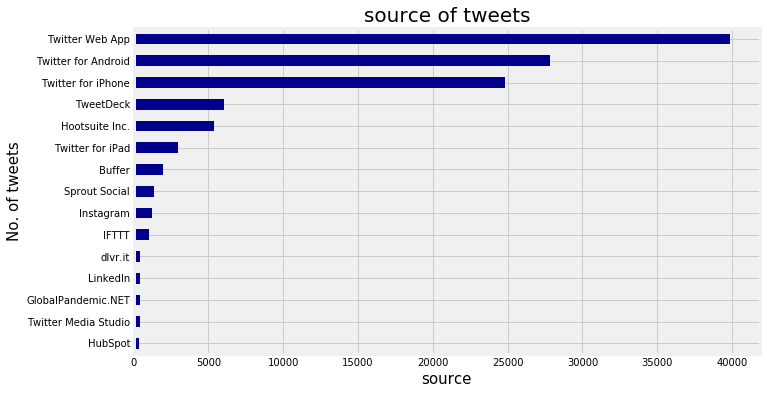

In [12]:
ax = df['source'].value_counts().nlargest(15).sort_values().plot(kind = 'barh', figsize=(10, 6), color= 'darkblue')
ax.set_xlabel('source', fontsize = '15')           # To set x axis label
ax.set_ylabel('No. of tweets', fontsize = '15')  # To set y axis label
ax.set_title('source of tweets', fontsize = '20')

In [13]:
df['hashtags'] = df['hashtags'].fillna('[]')
df['hashtags_count'] = df['hashtags'].apply(lambda x: len(x.split(',')))
df.loc[df['hashtags'] == '[]', 'hashtags_count'] = 0
df.head(10)

user_name               user_location  \
0                             ᏉᎥ☻լꂅϮ                  astroworld   
1                      Tom Basile 🇺🇸                New York, NY   
2                    Time4fisticuffs            Pewee Valley, KY   
3                        ethel mertz        Stuck in the Middle    
4                           DIPR-J&K           Jammu and Kashmir   
5                   🎹 Franz Schubert                 Новоро́ссия   
6                       hr bartender             Gainesville, FL   
7                     Derbyshire LPC                         NaN   
8                  Prathamesh Bendre                         NaN   
9  Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺  👇🏻location at link below👇🏻   

                                    user_description   user_created  \
0  wednesday addams as a disney princess keepin i...   5/26/17 5:46   
1  Husband, Father, Columnist & Commentator. Auth...  4/16/09 20:06   
2  #Christian #Catholic #Conservative #Reagan #Re...  2/28/09 18:57   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...    3/7/19 1:45   
4  🖊️Official Twitter handle of Department of Inf...   2/12/17 6:45   
5  🎼  #Новоро́ссия #Novorossiya #оставайсядома #S...  3/19/18 16:29   
6  Workplace tips and advice served up in a frien...  8/12/08 18:19   
7                                                NaN   2/3/12 18:08   
8   A poet, reiki practitioner and a student of law.   4/25/15 8:15   
9  Just as the body is one & has many members, & ...   8/17/14 4:53   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   
5            1180          1071             1287          False   
6           79956         54810             3801          False   
7             608           355               95          False   
8              25            29               18          False   
9           55201         34239            29802          False   

            date                                               text  \
0  7/25/20 12:27  If I smelled the scent of hand sanitizers toda...   
1  7/25/20 12:27  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  7/25/20 12:27  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  7/25/20 12:27  @brookbanktv The one gift #COVID19 has give me...   
4  7/25/20 12:27  25 July : Media Bulletin on Novel #CoronaVirus...   
5  7/25/20 12:27  #coronavirus #covid19 deaths continue to rise....   
6  7/25/20 12:27  How #COVID19 Will Change Work in General (and ...   
7  7/25/20 12:27  You now have to wear face coverings when out s...   
8  7/25/20 12:26  Praying for good health and recovery of @Chouh...   
9  7/25/20 12:26  POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...   

                            hashtags               source  is_retweet  \
0                                 []   Twitter for iPhone       False   
1                                 []  Twitter for Android       False   
2                        ['COVID19']  Twitter for Android       False   
3                        ['COVID19']   Twitter for iPhone       False   
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False   
5         ['coronavirus', 'covid19']      Twitter Web App       False   
6          ['COVID19', 'Recruiting']               Buffer       False   
7                                 []            TweetDeck       False   
8       ['covid19', 'covidPositive']  Twitter for Android       False   
9      ['HurricaneHanna', 'COVID19']   Twitter for iPhone       False   

   hashtags_count  
0               0  
1               0  
2               1  
3               1  
4               2  
5               2  
6               2  
7           

Text(0.5, 1.0, 'Distribution of number of hashtags')

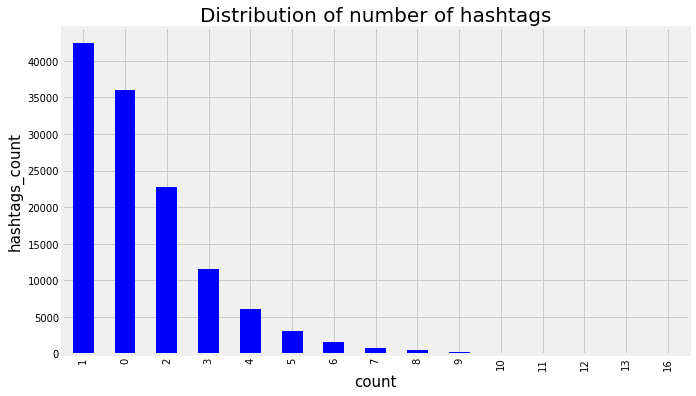

In [14]:
ax = df['hashtags_count'].value_counts().nlargest(15).plot(kind = 'bar', figsize=(10, 6), color= 'blue')
ax.set_xlabel('count', fontsize = '15')           # To set x axis label
ax.set_ylabel('hashtags_count', fontsize = '15')  # To set y axis label
ax.set_title('Distribution of number of hashtags', fontsize = '20')

In [15]:
def split_hashtags(x): 
    x = str(x)
    x = x.replace('[', '').replace(']', '')
    x = x.split(',')
    return x

df['hashtag'] = df['hashtags'].apply(lambda row : split_hashtags(row))
df = df.explode('hashtag')
df['hashtag'] = df['hashtag'].astype(str)
df['hashtag'] = df['hashtag'].str.replace("'", '')
df['hashtag'] = df['hashtag'].str.lower()
df['hashtag'] = df['hashtag'].str.replace(" ", '')
df = df[df['hashtag']!='nan']
df

user_name         user_location  \
0                 ᏉᎥ☻լꂅϮ            astroworld   
1          Tom Basile 🇺🇸          New York, NY   
2        Time4fisticuffs      Pewee Valley, KY   
3            ethel mertz  Stuck in the Middle    
4               DIPR-J&K     Jammu and Kashmir   
...                  ...                   ...   
125097    Agility Africa         Across Africa   
125098  Hartmut Herrmann      Leipzig, Germany   
125099        Shortpedia      New Delhi, India   
125099        Shortpedia      New Delhi, India   
125100   Parent Security                   NaN   

                                         user_description   user_created  \
0       wednesday addams as a disney princess keepin i...   5/26/17 5:46   
1       Husband, Father, Columnist & Commentator. Auth...  4/16/09 20:06   
2       #Christian #Catholic #Conservative #Reagan #Re...  2/28/09 18:57   
3       #Browns #Indians #ClevelandProud #[]_[] #Cavs ...    3/7/19 1:45   
4       🖊️Official Twitter handle of Department of Inf...   2/12/17 6:45   
...                                                   ...            ...   
125097  Agility funds and develops world-class warehou...  5/18/15 13:10   
125098  Atmospheric Chemistry Prof. & Dept Head , Phys...  2/23/18 18:46   
125099  Fresh handpicked content everyday.\n\n#EvolveE...  6/26/17 11:27   
125099  Fresh handpicked content everyday.\n\n#EvolveE...  6/26/17 11:27   
125100  #Parents who want to keep their #children #saf...  9/13/12 14:16   

        user_followers  user_friends  user_favourites  user_verified  \
0                  624           950            18775          False   
1                 2253          1677               24           True   
2                 9275          9525             7254          False   
3                  197           987             1488          False   
4               101009           168              101          False   
...                ...           ...              ...            ...   
125097             673           574              533          False   
125098             585           333             4235          False   
125099             739           166               60          False   
125099             739           166               60          False   
125100             102            43                8          False   

                 date                                               text  \
0       7/25/20 12:27  If I smelled the scent of hand sanitizers toda...   
1       7/25/20 12:27  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       7/25/20 12:27  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       7/25/20 12:27  @brookbanktv The one gift #COVID19 has give me...   
4       7/25/20 12:27  25 July : Media Bulletin on Novel #CoronaVirus...   
...               ...                                                ...   
125097   8/13/20 6:40  #Agility donates warehouse space to fight #COV...   
125098   8/13/20 6:40  Follow-up fm yesterday, HT @johnwenger9. Reall...   
125099   8/13/20 6:40  #Russia has rejected the reports raising safet...   
125099   8/13/20 6:40  #Russia has rejected the reports raising safet...   
125100   8/13/20 6:40  Hollywood clinic organizes socially-distant va...   

                                 hashtags               source  is_retweet  \
0                                      []   Twitter for iPhone       False   
1                                      []  Twitter for Android       False   
2                             ['COVID19']  Twitter for Android       False   
3                             ['COVID19']   Twitter for iPhone       False   
4       ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False   
...                                   ...                  ...         ...   
125097             ['Agility', 'COVID19']      Twitter Web App       False   
125098                                 []      Twitter Web App       False   
125099   ['Russia', '

Text(0.5, 1.0, 'Top 15 hashtags used')

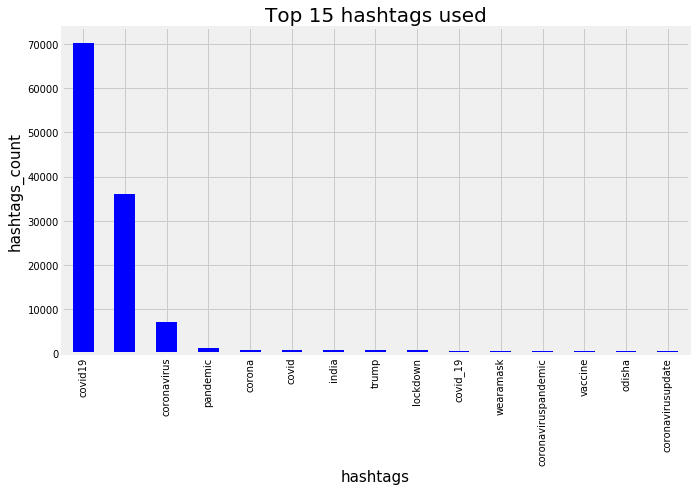

In [16]:
ax = df['hashtag'].value_counts().nlargest(15).plot(kind = 'bar', figsize=(10, 6), color= 'blue')
ax.set_xlabel('hashtags', fontsize = '15')           # To set x axis label
ax.set_ylabel('hashtags_count', fontsize = '15')  # To set y axis label
ax.set_title('Top 15 hashtags used', fontsize = '20')

In [17]:
fav = df[['user_favourites','text']].sort_values('user_favourites',ascending = False)[:5].reset_index()
for i in range(5):
    print(i,']', fav['text'][i],'\n')

0 ] So Trump wants everyone else's child to get #COVID19 but his son Baron gets an exception now that's messed up!!! 😡😤 https://t.co/hq5eZGjGY2 

1 ] Continue oscillazioni attorno ai 30-50 casi al giorno #Covid19  New daily virus cases spike to over 50 on church-li… https://t.co/Y77SU3A3LZ 

2 ] E anche arrivando rapidamente il vaccino... #covid19 Covid-19: only half of Britons would definitely have vaccinati… https://t.co/0RtDrUYoqY 

3 ] Ancora lockdown mirati nel Regno Unito #Covid19 Coronavirus live news: UK recalls home tests over safety concerns a… https://t.co/Xq9zKq1HJ3 

4 ] Era il 29 marzo scorso #Covid19 #USA #Fauci Estimates That 100,000 To 200,000 Americans Could Die From The Coronavi… https://t.co/pc4sgpjfrr 



In [18]:
df['date'] = pd.to_datetime(df['date']) 
df = df.sort_values(['date'])
df['day'] = df['date'].astype(str).str.split(' ', expand=True)[0]
df['time'] = df['date'].astype(str).str.split(' ', expand=True)[1]
df


user_name      user_location  \
17168                                        carsinogenic                NaN   
17169                                     Jason Schreiber      New Hampshire   
17160                      Center on Trauma and Adversity      Cleveland, OH   
17161                                        IAM Platform          Worldwide   
17162   CA Business, Consumer Services and Housing Agency     Sacramento, CA   
...                                                   ...                ...   
117608                                        Local Trust            England   
117609                                  Guidehouse Health     Washington, DC   
117611                                 Catalan Government          Catalonia   
117604                                       DhakaTribune  Dhaka, Bangladesh   
117610                                    Lewis J. Kaplan        Chicago, IL   

                                         user_description    user_created  \
17168   cars are WMDs \r\ntoo many on this planet 4 fa...     9/9/08 0:50   
17169   Reporter for the New Hampshire Union Leader. D...    3/27/09 2:33   
17160   Reducing the impact of #trauma and #adversity ...  10/26/17 18:48   
17161   Curation | Tools | Tips | Services\n\nIAM Plat...  12/13/10 21:24   
17162   We are responsible for licensing and oversight...  10/15/12 18:10   
...                                                   ...             ...   
117608  Supporting people to do brilliant things in th...   11/9/11 12:08   
117609  Source for research & insights from Guidehouse...   2/24/11 17:02   
117611  Government of Catalonia. This account diffuses...    3/13/14 9:09   
117604  Dhaka Tribune is the fastest growing English d...    8/14/12 9:01   
117610  2020 President of the Society of Critical Care...    2/14/14 0:28   

        user_followers  user_friends  user_favourites  user_verified  \
17168              749          3076            26747          False   
17169             4557          2385             9375          False   
17160             6292           446             3619          False   
17161            17816         14941            65440          False   
17162             1351           278              278          False   
...                ...           ...              ...            ...   
117608            6567          1047             6066          False   
117609            1875          1302              827          False   
117611           59467           363             1633           True   
117604          316940           190               55          False   
117610            9459          3418              845          False   

                      date                                               text  \
17168  2020-07-24 23:47:00  Chief public health officer warns of pandemic ...   
17169  2020-07-24 23:47:00  While the stands may be empty at #Fenway, the ...   
17160  2020-07-24 23:47:00  Some more excellent work from our Assistant Di...   
17161  2020-07-24 23:47:00  Donald Trump holds ‘tele-rally’ in campaign fi...   
17162  2020-07-24 23:47:00  We all play a part in keeping our communities ...   
...                    ...                                                ...   
117608 2020-08-13 10:46:00  A balance of formal and informal community app...   
117609 2020-08-13 10:46:00  With #COVID19, no one knows how long patients ...   
117611 2020-08-13 10:46:00  ▶ The Catalan government has launched an ad ca...   
117604 2020-08-13 10:46:00  Sweden, #UNFPA help #Bangladesh in #Covid19 re...   
117610 2020-08-13 10:46:00  This quick read details one of the few benefic...   

                                  hashtags               source  is_retweet  \
17168                          ['COVID19']      Twitter Web App       False   
17169                           ['Fenway']   Twitter for iPhone       False   
17160                                   []   Twitter for iPhone       False   
17161   

Text(0.5, 1.0, 'Distribution of tweets on each day')

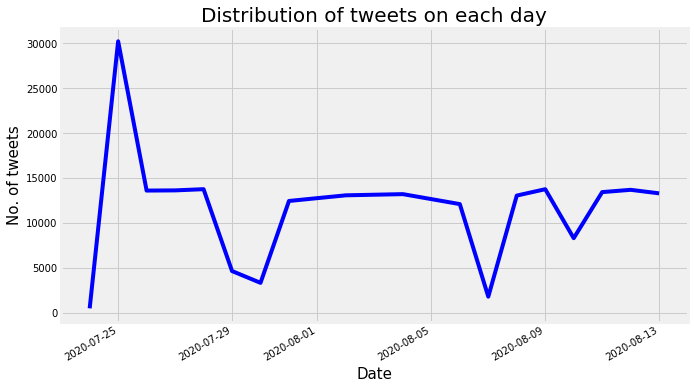

In [19]:
df['day'] =  pd.to_datetime(df['day'], format='%Y-%m-%d')
ax = df['day'].value_counts().plot(figsize=(10, 6), color= 'blue')
ax.set_xlabel('Date', fontsize = '15')           # To set x axis label
ax.set_ylabel('No. of tweets', fontsize = '15')  # To set y axis label
ax.set_title('Distribution of tweets on each day', fontsize = '20')

In [20]:
df['time'] =  pd.to_datetime(df['time'], format='%H:%M:%S')

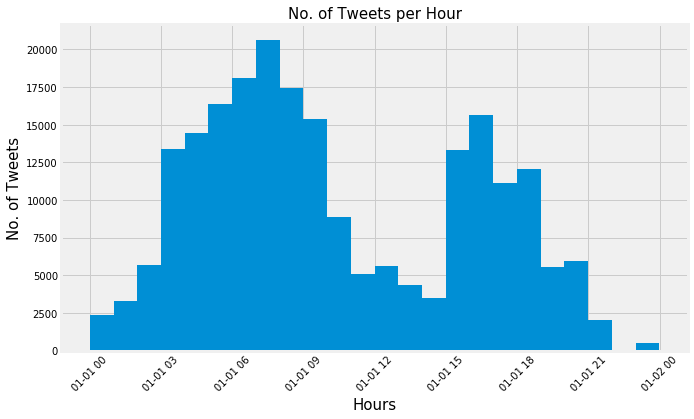

In [21]:
plt.figure(1, figsize=(10,6))
plt.hist(df["time"],bins = 24);
plt.xlabel('Hours',size = 15)
plt.ylabel('No. of Tweets',size = 15)
plt.title('No. of Tweets per Hour',size = 15)
plt.xticks(rotation=45)
plt.show()


In [22]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

df1 = df[['text']].copy()
df1.columns = ["tweets"]
# Clean the tweets
df1['tweets']= df1['tweets'].apply(cleanTxt)

# Show the cleaned tweets
df1.head()

tweets
17168  Chief public health officer warns of pandemic ...
17169  While the stands may be empty at Fenway, the  ...
17160  Some more excellent work from our Assistant Di...
17161  Donald Trump holds ‘tele-rally’ in campaign fi...
17162  We all play a part in keeping our communities ...

### Subjectivity (how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion) and the other to get the tweets called Polarity (how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score).

In [23]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df1['Subjectivity'] = df1['tweets'].apply(getSubjectivity)
df1['Polarity'] = df1['tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df1.head()

tweets  Subjectivity  \
17168  Chief public health officer warns of pandemic ...      0.233333   
17169  While the stands may be empty at Fenway, the  ...      0.500000   
17160  Some more excellent work from our Assistant Di...      0.750000   
17161  Donald Trump holds ‘tele-rally’ in campaign fi...      0.416667   
17162  We all play a part in keeping our communities ...      0.450000   

       Polarity  
17168     0.050  
17169    -0.125  
17160     0.750  
17161     0.375  
17162     0.100

In [24]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
df1['Analysis'] = df1['Polarity'].apply(getAnalysis)
# Show the dataframe
df1.head()

tweets  Subjectivity  \
17168  Chief public health officer warns of pandemic ...      0.233333   
17169  While the stands may be empty at Fenway, the  ...      0.500000   
17160  Some more excellent work from our Assistant Di...      0.750000   
17161  Donald Trump holds ‘tele-rally’ in campaign fi...      0.416667   
17162  We all play a part in keeping our communities ...      0.450000   

       Polarity  Analysis  
17168     0.050  Positive  
17169    -0.125  Negative  
17160     0.750  Positive  
17161     0.375  Positive  
17162     0.100  Positive

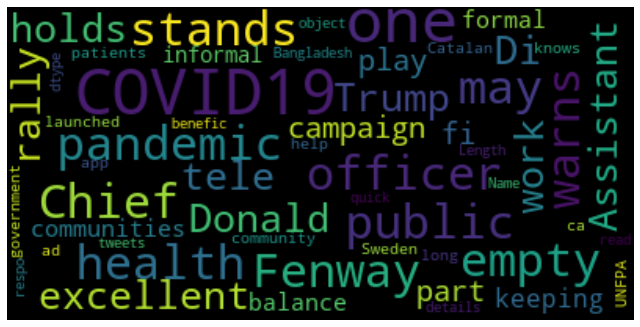

In [25]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df1['tweets'])

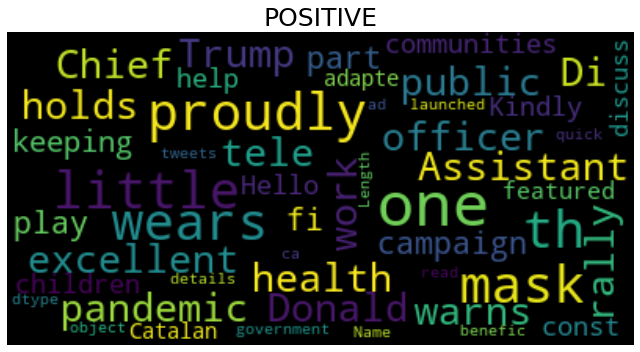

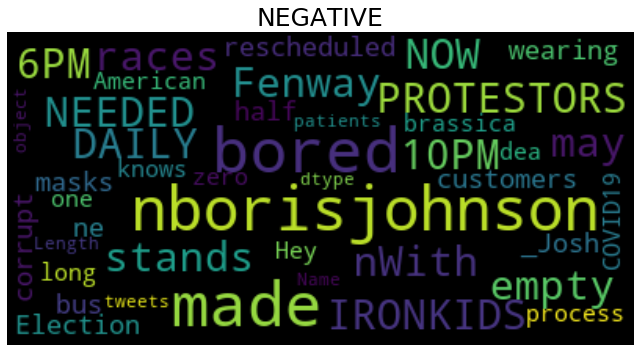

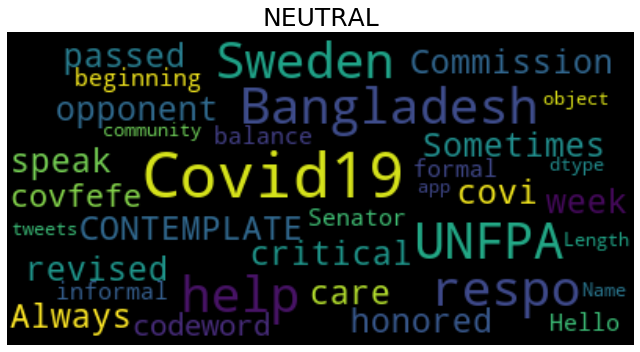

In [26]:
pos = df1['tweets'][df1['Analysis'] == 'Positive']
show_wordcloud(pos , 'POSITIVE')

neg = df1['tweets'][df1['Analysis'] == 'Negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = df1['tweets'][df1['Analysis'] == 'Neutral']
show_wordcloud(neutral , 'NEUTRAL')

In [27]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df1.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] is 'Positive'):
        print(str(j) + ') '+ sortedDF['tweets'][i])
        print()
        j= j+1

Printing positive tweets:

1) Hey   and  - wouldn't it have made more sense to have the players pay their respects to the A… 

2) 👋🏻  — no one will be safe from COVID19 until everyone is safe. Will you commit to ensure… 

3) Let's all protect ourselves from COVID19.
It's real and the numbers are climbing up fast in the Continent.
Let's n… 

4) COVID Update: The infection rate in Florida is following the natural curve that experts predicted if the initial cu… 

5)   Good Patriots!
Call to Volunteer to be an Election Judge. 
Polls cannot open without… 

6) A safe place to visit? Here is what our guests said, "The hotel were meticulous in applying hand sanitation and als… 

7) Our CEO  live with _Jikelele WSU talking about, “The effects of Covid-19 on students”.… 

8) We released two new COVID19 podcast episodes this week:
-Technology Platforms Used to Conduct Telehealth Visits
-C… 

9)  Venezuela's Economy/Budget are tied to Oil like Louisiana's. Funny how the right-wing "example" of… 



KeyError: 125101

In [28]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df1.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    
    if( sortedDF['Analysis'][i] is 'Negative'):
        print(str(j) + ') '+sortedDF['tweets'][i])
        print()
        j=j+1

Printing negative tweets:

1) If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… 

2)  Your image doesn't list a source, but I'd be careful with overall "risk of dying" statistics related to… 

3) 5 19 I'm feeling a little anxious because COVID19 seems to have detracted everyone's… 

4) Britain didn't understand Covid19 for months, while plenty of other countries did understand it and took effective… 

5) Crazy that the world has come to this but as Americans we will fight to get through this!🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸 covid19

6)  sir mom is in ICU due to COVID just want prayers from you and everyone who is listening you . COVID19

7) By the time you see a spike in Covid19 cases, it isvery hard to reverse it without drastic lockdown. By the time y… 

8) Hi long time no see...... In preparation for us reopening we have been doing our homework and some...... clean… 

9) OK I'm angry now. I cannot believe the stupidity there is out there 

KeyError: 125101

In [ ]:
# Print the percentage of positive tweets
ptweets = df1[df1.Analysis == 'Positive']
ptweets = ptweets['tweets']
ptweets

print('Percentage of positive tweets =',round( (ptweets.shape[0] / df1.shape[0]) * 100 , 1))

# Print the percentage of negative tweets
ntweets = df1[df1.Analysis == 'Negative']
ntweets = ntweets['tweets']
ntweets

print('Percentage of negative tweets =',round( (ntweets.shape[0] / df1.shape[0]) * 100, 1))

# Print the percentage of neutral tweets
ntweets = df1[df1.Analysis == 'Neutral']
ntweets = ntweets['tweets']
ntweets

print('Percentage of neutral tweets =', round( (ntweets.shape[0] / df1.shape[0]) * 100, 1))

In [ ]:
# Plotting and visualizing the counts
df1['Analysis'].value_counts().plot(kind = 'bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()